In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

Columns in dataset:
- batting average
- runs scored/times at bat
- doubles/times at bat
- triples/times at bat
- home runs/times at bat
- strike outs/times at bat 

In [10]:
bb = pd.read_csv('baseballs.csv',header=None,
                 names=['batting_average','runs_scored','doubles','triples','home_runs','strike_outs'])
bb.head()

,batting_average,runs_scored,doubles,triples,home_runs,strike_outs
0,0.283,0.144,0.049,0.012,0.013,0.086
1,0.276,0.125,0.039,0.013,0.002,0.062
2,0.281,0.141,0.045,0.021,0.013,0.074
3,0.328,0.189,0.043,0.001,0.030,0.032
4,0.290,0.161,0.044,0.011,0.070,0.076


In [11]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
batting_average    45 non-null float64
runs_scored        45 non-null float64
doubles            45 non-null float64
triples            45 non-null float64
home_runs          45 non-null float64
strike_outs        45 non-null float64
dtypes: float64(6)
memory usage: 2.2 KB


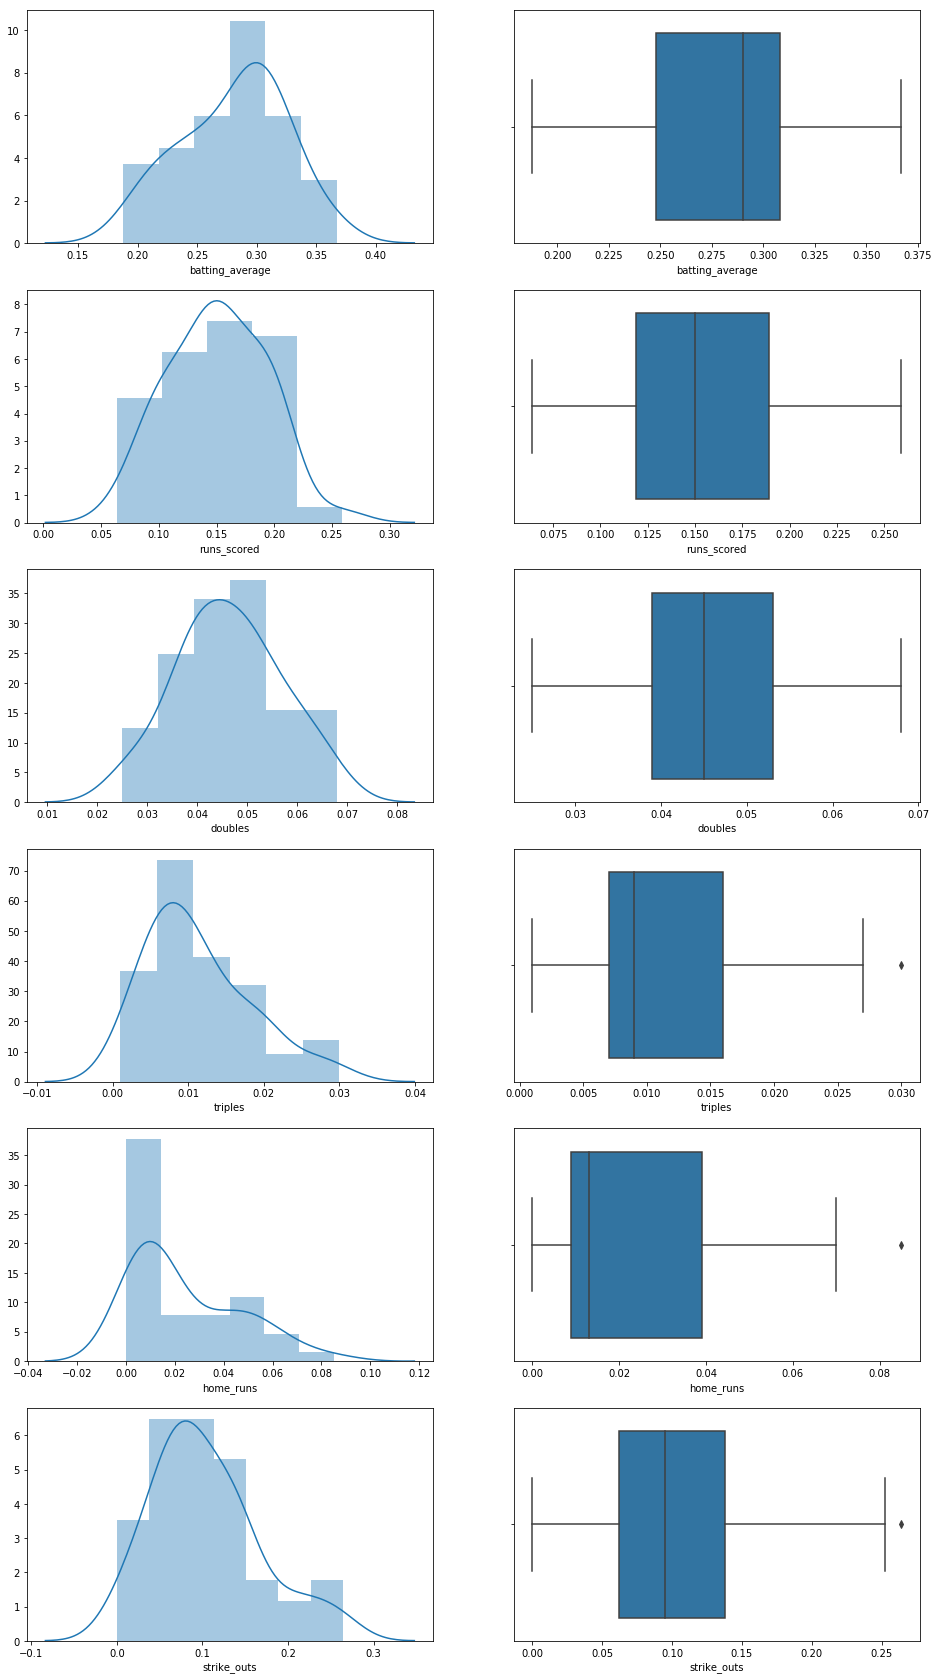

In [16]:
# dist plots for numerical columns
fig,ax = plt.subplots(6,2,figsize=(16,30))
i = 0
for col in bb.columns:
    sns.distplot(bb[col],ax=ax[i,0])
    sns.boxplot(bb[col],ax=ax[i,1])
    i = i + 1
plt.show()

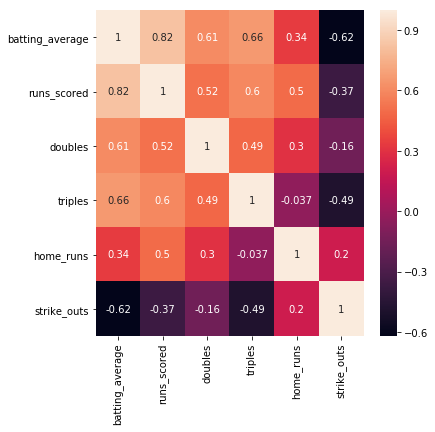

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(bb.corr(),annot=True)
plt.show()

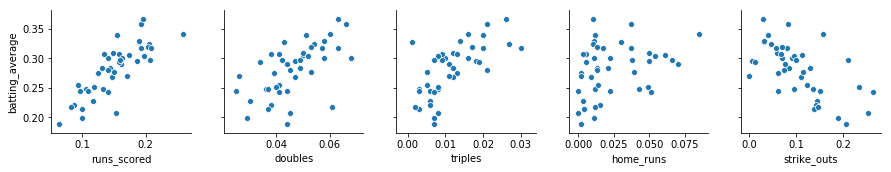

In [20]:
sns.pairplot(bb,x_vars=['runs_scored','doubles','triples','home_runs','strike_outs'], y_vars='batting_average')
plt.show()

## Part 2

- batting average is our dependent variable that we want to predict
- all the others are independent variables

In [39]:
x = bb.drop('batting_average',axis=1)
y = bb['batting_average']

- Scaling all the independent variables

In [40]:
from sklearn.preprocessing import StandardScaler
x_scaled = DataFrame(StandardScaler().fit_transform(x),columns=x.columns,index=x.index)
x_scaled.head()

,runs_scored,doubles,triples,home_runs,strike_outs
0,-0.165840,0.255879,0.103330,-0.511853,-0.294029
1,-0.623237,-0.711731,0.248638,-1.011592,-0.678941
2,-0.238061,-0.131165,1.411102,-0.511853,-0.486485
3,0.917469,-0.324687,-1.495058,0.260470,-1.160080
4,0.243410,-0.227926,-0.041978,2.077701,-0.454409


- Building a base model with all variables to see significance of their coefficients

In [41]:
import statsmodels.api as sm
x_sm = sm.add_constant(x_scaled)
ols1 = sm.OLS(y,x_sm).fit()
ols1.params

C:\Users\mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          0.280467
runs_scored    0.018555
doubles        0.010241
triples        0.004278
home_runs      0.006025
strike_outs   -0.017743
dtype: float64

In [42]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        batting_average   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     47.96
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.26e-15
Time:                        02:10:24   Log-Likelihood:                 121.47
No. Observations:                  45   AIC:                            -230.9
Df Residuals:                      39   BIC:                            -220.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2805      0.003    107.636      0.000       0.275       0.286
runs_scored     0.0186      0.005      4.074      0.000       0.009       0.028
doubles         0.0102      0.003      3.165      0.003       0.004       0.017
triples         0.0043      0.004      1.070      0.291      -0.004       0.012
home_runs       0.0060      0.004      1.616      0.114      -0.002       0.014
strike_outs    -0.0177      0.003     -5.497      0.000      -0.024      -0.011
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.373
Skew:                           0.144   Prob(JB):                        0.830
Kurtosis:                       2.660   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p-value for *triples* and *home_runs* columns are > 0.05 indicating they are NOT significant
- *runs_scored*, *doubles* and *strike outs* all have p-value < 0.05 indicating they are significant

- Building a new model with just the three significant variables

In [46]:
x_scaled = x_scaled[['runs_scored','doubles','strike_outs']]
x_scaled.head()

,runs_scored,doubles,strike_outs
0,-0.165840,0.255879,-0.294029
1,-0.623237,-0.711731,-0.678941
2,-0.238061,-0.131165,-0.486485
3,0.917469,-0.324687,-1.160080
4,0.243410,-0.227926,-0.454409


Splitting into training and test data sets

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [50]:
xtrain.shape

(31, 3)

In [51]:
xtest.shape

(14, 3)

In [52]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
ytrain_pred = lm1.predict(xtrain)
print('Training Accuracy: ')
print('MSE =', mean_squared_error(ytrain_pred,ytrain))
print('R^2 = ', r2_score(ytrain_pred,ytrain))

Training Accuracy: 
MSE = 0.0002514926052333931
R^2 =  0.8609426540739834


In [55]:
ytest_pred = lm1.predict(xtest)
print('Test Accuracy: ')
print('MSE =', mean_squared_error(ytest_pred,ytest))
print('R^2 = ', r2_score(ytest_pred,ytest))

Test Accuracy: 
MSE = 0.00042594154441600804
R^2 =  0.631519704483761


- We get a high training accuracy with R^2 = 0.86 but a significantly lower test accuracy at 0.63